In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
sns.set(font_scale=1.4)
import missingno as msno


<h4>Describe how you want to make use of merchants.csv, historical transactions.csv, and new merchant transactions.csv, for user loyalty prediction. Note, this is a very important question, you may want to update your whole pipeline multiple times to find the best usage of three files. </h4>

<p> <ul> <li> I will try to merge these colunms <li> After merging these columns i will try to append score and see what records 
    doesn't have score to drop it </ul></p>

In [5]:
# Data'/userscore.csv
user_Score=pd.read_csv(r'Data/userscore.csv')
new_marchant=pd.read_csv(r'Data/new_merchant_transactions.csv')
marchants=pd.read_csv(r'Data/merchants.csv')
historical_transaction=pd.read_csv(r'Data/historical_transactions.csv')

In [6]:
# show our data 
user_Score.head()


,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749


<p>Three features are provided, <strong>all of which are anonymized card
categorical features.</strong> </p>

In [7]:
user_Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   card_id             201917 non-null  object 
 1   first_active_month  201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   score               201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


<p>For the first table there is <strong>no missing Values</strong> </p>

In [8]:
new_marchant.head()


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [10]:
new_marchant.isna().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [11]:
marchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [12]:
marchants.isna().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [13]:
historical_transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [19]:
historical_transaction.isna().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [23]:
l=[user_Score,new_marchant,marchants,historical_transaction]
z=['user_Score','new_marchant','marchants','historical_transaction']
for a,i in zip(z,l) :
    print ('Shape of {0} is : {1}'.format(a,i.shape))

Shape of user_Score is : (201917, 6)
Shape of new_marchant is : (1963031, 14)
Shape of marchants is : (334696, 22)
Shape of historical_transaction is : (29112361, 14)


* As **historical_transaction** and **new_marchant** has the same features we can **concatenate** them .

In [24]:
historicalNewmarchant=pd.concat([historical_transaction,new_marchant])

In [26]:
historicalNewmarchant.isna().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               234081
merchant_category_id          0
merchant_id              164697
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2764609
state_id                      0
subsector_id                  0
dtype: int64

In [6]:
allData=pd.merge(marchants,pd.merge(historical_transaction,new_marchant , how='outer'),how='inner' ,on ='merchant_id')

In [7]:
allData=pd.merge(user_Score,allData,how='inner' ,on ='card_id')

In [8]:
allData.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,score,merchant_id,merchant_group_id,merchant_category_id_x,subsector_id_x,...,category_1_y,installments,category_3,merchant_category_id_y,month_lag,purchase_amount,purchase_date,category_2_y,state_id_y,subsector_id_y
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,M_ID_4eb5a9747a,5945,560,34,...,N,0,A,560,-2,-0.705224,2017-12-09 08:58:35,1.0,9,34
1,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,M_ID_503ec2380f,95451,278,37,...,N,0,A,278,2,-0.307758,2018-04-07 14:48:20,1.0,9,37
2,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,M_ID_1ebcc07c29,2294,195,34,...,N,0,A,195,0,-0.720762,2018-02-12 15:46:30,1.0,9,34
3,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,M_ID_2ad4dbe808,52884,80,37,...,N,0,A,80,-6,-0.731130,2017-08-11 10:53:28,1.0,9,37
4,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,M_ID_81fdaa610e,42803,884,27,...,N,0,A,884,-1,-0.652241,2018-01-03 13:47:14,5.0,5,27


<p> I think there is some features that are not important <strong>state_id_y ,merchant_category_id_y,subsector_id_x,state_id_x,subsector_id_y,merchant_category_id_x,merchant_category_id_y</strong></p>

In [14]:
allData.drop(['state_id_y' ,'merchant_category_id_y','subsector_id_x','state_id_x','subsector_id_y','merchant_category_id_x','merchant_category_id_y'],axis=1,inplace=True)

In [15]:
allData.shape

(19923436, 34)

<h4> Q2 ) Discuss the quality of the dataset, considering missing values, missing value patterns, missing value mechanism, and noise (e.g.,consistency). Note, you do not need to discuss each attribute in each table. Focus on the ones you believe are the most important for user (card) loyalty analysis and prediction. </h4>

In [21]:
import missingno as msno


<AxesSubplot:>

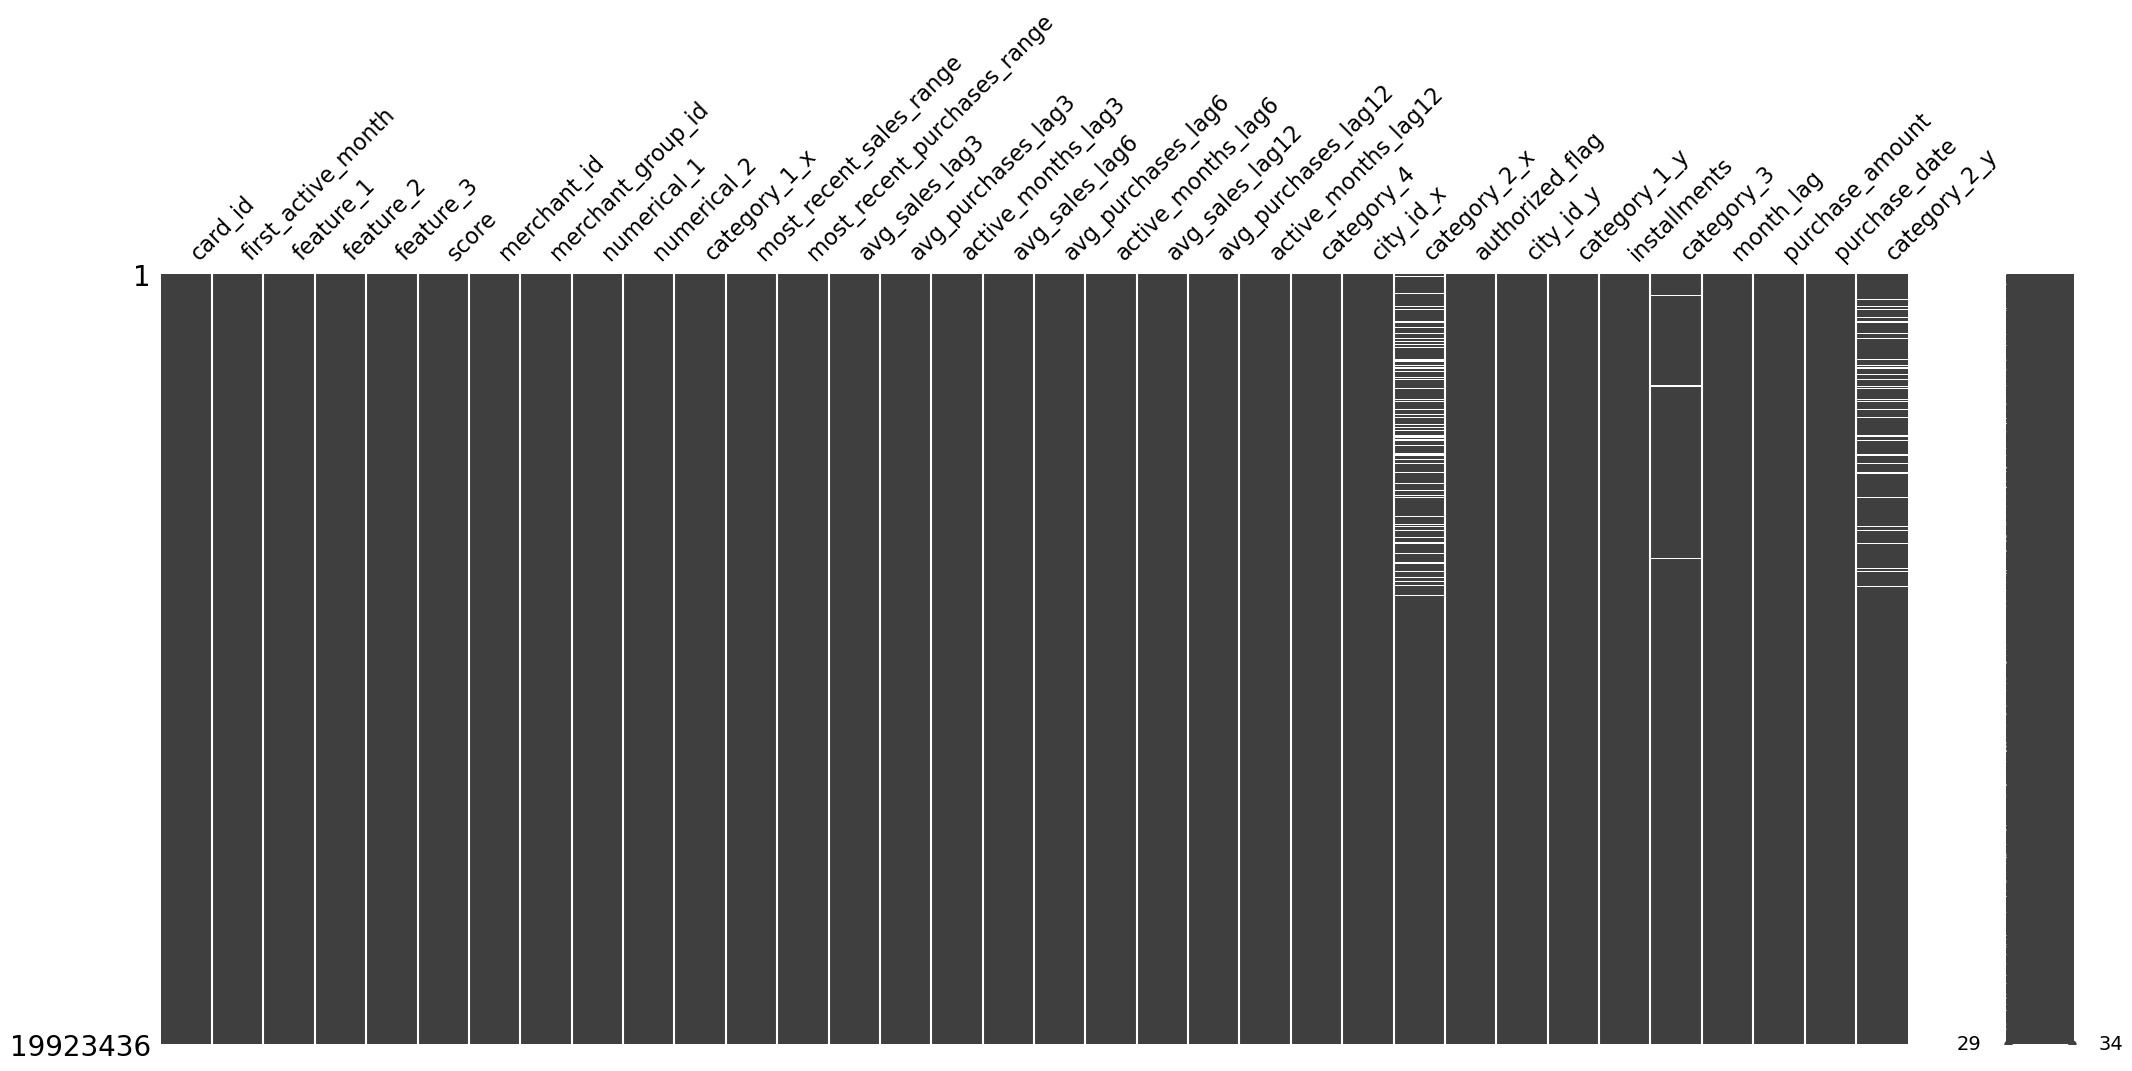

In [22]:
msno.matrix(allData)


* As seen there are almost two columns which have missing values **Category_2_x** and **Category_2_y** and when we see in patterns of its missing values we notice that they are not at random **(MNAR)**

In [31]:
nulls=pd.DataFrame(pd.Series(allData.isna().sum(),allData.columns) , columns=['Count Missing'])

In [33]:
nulls['Percentage']=nulls['Count Missing'] * 100 / allData.shape[0]

In [34]:
nulls

,Count Missing,Percentage
card_id,0,0.000000
first_active_month,0,0.000000
feature_1,0,0.000000
feature_2,0,0.000000
feature_3,0,0.000000
score,0,0.000000
merchant_id,0,0.000000
merchant_group_id,0,0.000000
numerical_1,0,0.000000
numerical_2,0,0.000000


<AxesSubplot:xlabel='Count Missing'>

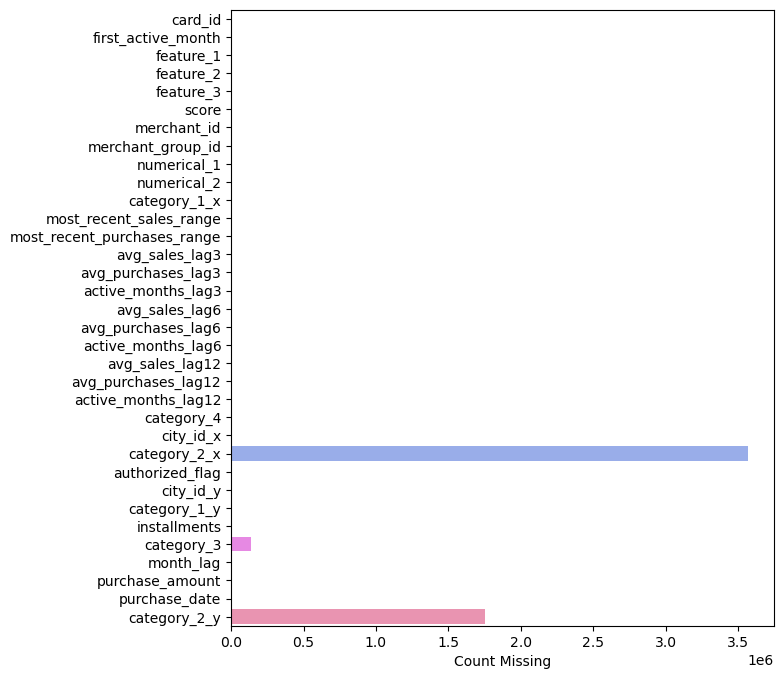

In [47]:
fig=plt.figure(figsize=(7,8))
sns.barplot(x=nulls['Count Missing'] , y=allData.columns)

* As seen from graph and **info** there are another missing data that we couldn't see in **graph** because of the large size of records 

<h3> Q3) Perform necessary data cleaning based on your answer to Q2. </h3>

* As the percentage of nulls is little compared to the size of the data we can **drop it** .

In [48]:
allData.dropna(inplace=True)

In [49]:
allData.isna().sum()

card_id                        0
first_active_month             0
feature_1                      0
feature_2                      0
feature_3                      0
score                          0
merchant_id                    0
merchant_group_id              0
numerical_1                    0
numerical_2                    0
category_1_x                   0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
city_id_x                      0
category_2_x                   0
authorized_flag                0
city_id_y                      0
category_1_y                   0
installments                   0
category_3                     0
month_lag 

In [50]:
print("shape after delete nulls is {}".format(allData.shape))

shape after delete nulls is (16071992, 34)


In [51]:
allData['card_id'].nunique()

196614

In [52]:
liOfUniqueCardId=allData['card_id'].unique()

In [53]:
allData.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,score,merchant_id,merchant_group_id,numerical_1,numerical_2,...,category_2_x,authorized_flag,city_id_y,category_1_y,installments,category_3,month_lag,purchase_amount,purchase_date,category_2_y
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,M_ID_4eb5a9747a,5945,-0.057471,-0.057471,...,1.0,Y,69,N,0,A,-2,-0.705224,2017-12-09 08:58:35,1.0
1,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,M_ID_503ec2380f,95451,-0.057471,-0.057471,...,1.0,Y,69,N,0,A,2,-0.307758,2018-04-07 14:48:20,1.0
2,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,M_ID_1ebcc07c29,2294,-0.057471,-0.057471,...,1.0,Y,69,N,0,A,0,-0.720762,2018-02-12 15:46:30,1.0
3,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,M_ID_2ad4dbe808,52884,-0.057471,-0.057471,...,1.0,Y,231,N,0,A,-6,-0.731130,2017-08-11 10:53:28,1.0
4,C_ID_92a2005557,Jun-17,5,2,1,-0.820283,M_ID_81fdaa610e,42803,-0.057471,-0.057471,...,5.0,Y,181,N,0,A,-1,-0.652241,2018-01-03 13:47:14,5.0


In [55]:
# calculating the difference between category_2_x , category_2_y
allData.shape[0]-(allData.category_2_x == allData.category_2_y).sum()

512049

In [58]:
allData.loc[allData.category_2_x != allData.category_2_y,['category_2_x','category_2_y']]

,category_2_x,category_2_y
1285,2.0,4.0
1286,2.0,4.0
1287,2.0,4.0
1288,2.0,4.0
1289,2.0,4.0
...,...,...
19921845,4.0,3.0
19921846,4.0,3.0
19921847,4.0,3.0
19921848,4.0,3.0


In [59]:
corr = allData.category_2_x.corr(allData.category_2_y)

# print the correlation
print(corr)


0.9683771925512769


In [60]:
# Their correlation with the target
corr = allData.category_2_x.corr(allData.score)
corr1 = allData.category_2_y.corr(allData.score)

# print the correlation
print(corr)
print(corr1)


0.00534118774623116
0.005435888731826472


* As the number of difference values in category_2_x , category_2_y is small and there is a strong correleation between them ew can Drop one of them 

In [62]:
allData.drop('category_2_x',axis=1,inplace=True)

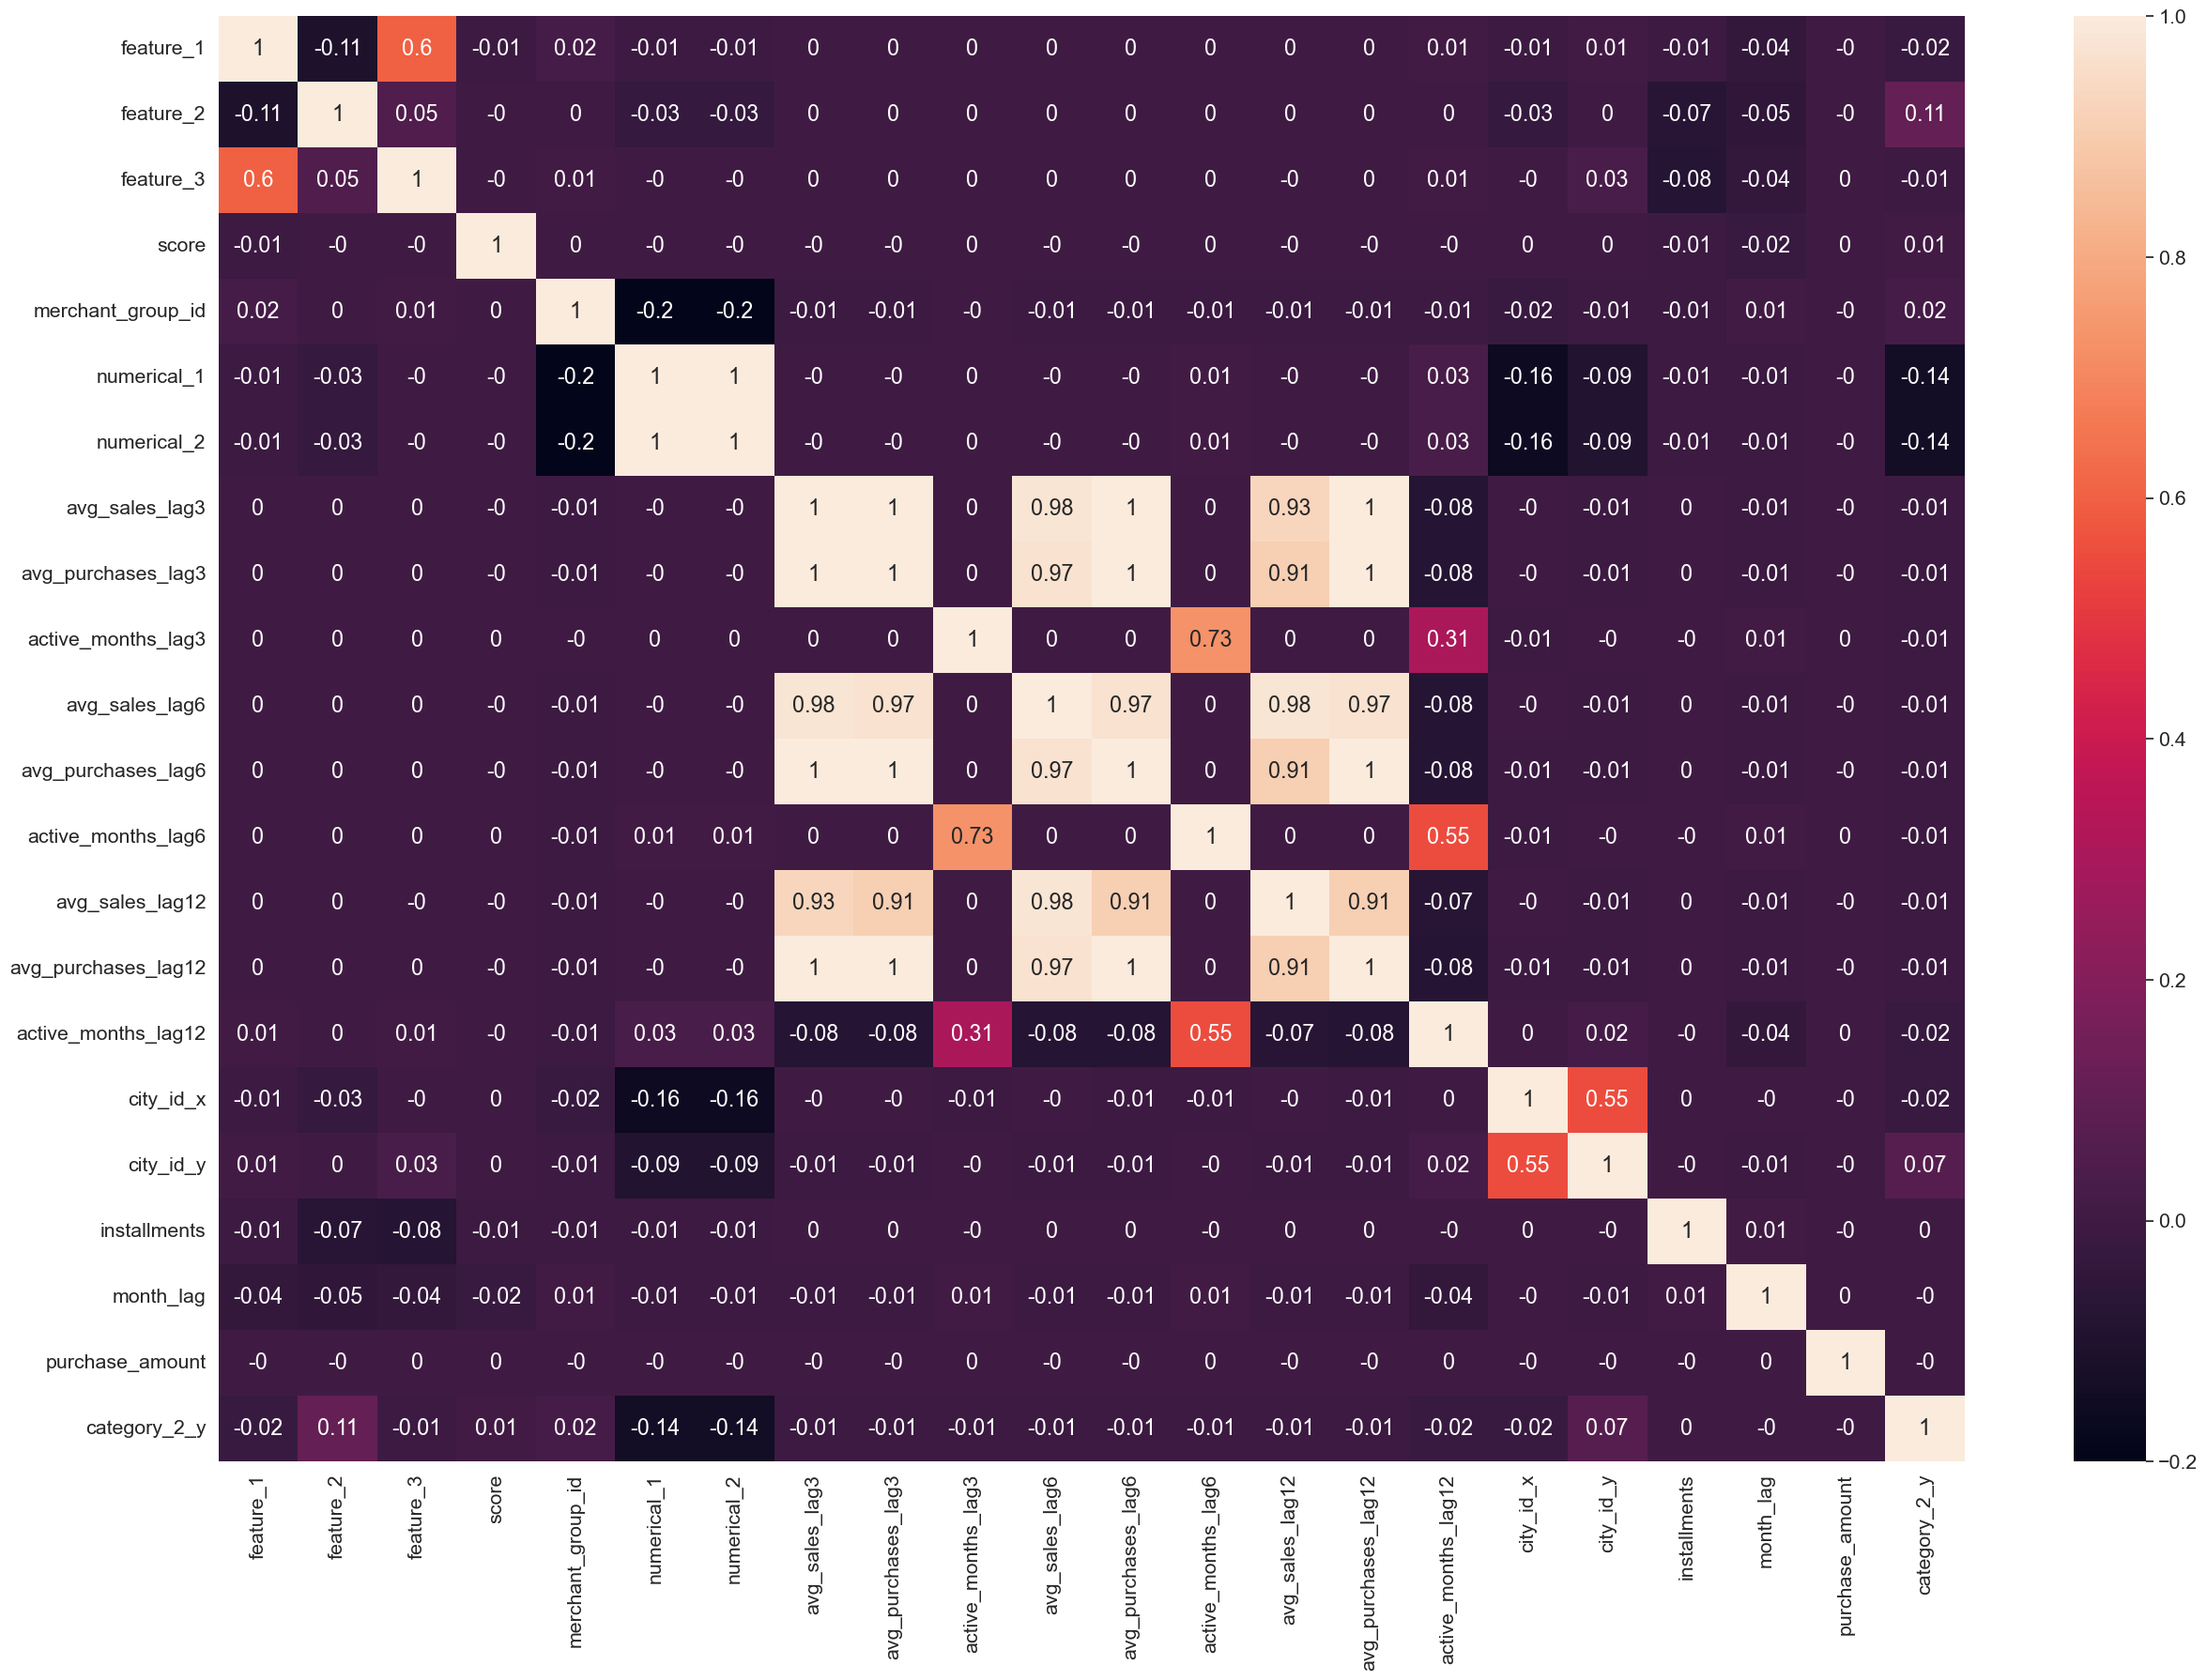

In [66]:
numerical_cols = list(selected_data.select_dtypes(exclude=['object']).columns)

fig, ax = plt.subplots(figsize=(30, 20))
cor_df = allData.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T' 
